# The Importance of Visualization

The Anscombe dataset is a dataset often used to demonstrate the importance of visualization in exploratory data analysis. It consists of four different sets of data that have identical statistical properties (mean, variance, correlation, and linear regression), but look very different when plotted. H

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# create the Anscombe dataset
data = {
    'x1': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'y1': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    'x2': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'y2': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
    'x3': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'y3': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    'x4': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    'y4': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
}

# create a pandas dataframe from the data
df = pd.DataFrame(data)

# print the dataframe
print(df)

      x1     y1    x2    y2    x3     y3    x4     y4
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89


## Compute some common statistics

* Mean - unweighted average of the data
* Variance - measre of the spread around the mean
* Correlation - measure of linear relationship between two variables
* Linear Regression - predicts relationship between independent and dependent variable using linear models ($\hat{y} = x_0 + \beta_1 x_1 + \beta_2 x_2 + \dots$)

In [2]:
# mean values (x-bar)
x1_mean = df['x1'].mean()
x2_mean = df['x2'].mean()
x3_mean = df['x3'].mean()
x4_mean = df['x4'].mean()

# y-bar
y1_mean = df['y1'].mean()
y2_mean = df['y2'].mean()
y3_mean = df['y3'].mean()
y4_mean = df['y4'].mean()


# Standard deviation values (x-bar)
x1_std = df['x1'].std()
x2_std = df['x2'].std()
x3_std = df['x3'].std()
x4_std = df['x4'].std()

# Standard deviation values (y-bar)
y1_std = df['y1'].std()
y2_std = df['y2'].std()
y3_std = df['y3'].std()
y4_std = df['y4'].std()

# Correlation
correlation_x1y1 = np.corrcoef(df['x1'],df['y1'])[0,1]
correlation_x2y2 = np.corrcoef(df['x2'],df['y2'])[0,1]
correlation_x3y3 = np.corrcoef(df['x3'],df['y3'])[0,1]
correlation_x4y4 = np.corrcoef(df['x4'],df['y4'])[0,1]

# Linear Regression slope and intercept
m1,c1 = np.polyfit(df['x1'], df['y1'], 1)
m2,c2 = np.polyfit(df['x2'], df['y2'], 1)
m3,c3 = np.polyfit(df['x3'], df['y3'], 1)
m4,c4 = np.polyfit(df['x4'], df['y4'], 1)

# Residual sum of squares error
RSSY_1 = ((df['y1'] - (m1*df['x1']+c1))**2).sum()
RSSY_2 = ((df['y2'] - (m2*df['x2']+c2))**2).sum()
RSSY_3 = ((df['y3'] - (m3*df['x3']+c3))**2).sum()
RSSY_4 = ((df['y4'] - (m4*df['x4']+c4))**2).sum()

# Total sum of squares
TSS_1 = ((df['y1'] - y1_mean)**2).sum()
TSS_2 = ((df['y2'] - y2_mean)**2).sum()
TSS_3 = ((df['y3'] - y3_mean)**2).sum()
TSS_4 = ((df['y4'] - y4_mean)**2).sum()

# R squared (coefficient of determination)
R2_1 = 1 - (RSSY_1 / TSS_1)
R2_2 = 1 - (RSSY_2 / TSS_2)
R2_3 = 1 - (RSSY_3 / TSS_3)
R2_4 = 1 - (RSSY_4 / TSS_4)

# Create a pandas dataframe to represent the summary statistics
summary_stats = pd.DataFrame({'Mean_x': [x1_mean, x2_mean, x3_mean, x4_mean],
							'Variance_x': [x1_std**2, x2_std**2, x3_std**2, x4_std**2],
							'Mean_y': [y1_mean, y2_mean, y3_mean, y4_mean],
							'Variance_y': [y1_std**2, y2_std**2, y3_std**2, y4_std**2],
							'Correlation': [correlation_x1y1, correlation_x2y2, correlation_x3y3, correlation_x4y4],
							'Linear Regression slope': [m1, m2, m3, m4],
							'Linear Regression intercept': [c1, c2, c3, c4]},
index = ['I', 'II', 'III', 'IV'])
print(summary_stats.T)

                                     I         II        III         IV
Mean_x                        9.000000   9.000000   9.000000   9.000000
Variance_x                   11.000000  11.000000  11.000000  11.000000
Mean_y                        7.500909   7.500909   7.500000   7.500909
Variance_y                    4.127269   4.127629   4.122620   4.123249
Correlation                   0.816421   0.816237   0.816287   0.816521
Linear Regression slope       0.500091   0.500000   0.499727   0.499909
Linear Regression intercept   3.000091   3.000909   3.002455   3.001727


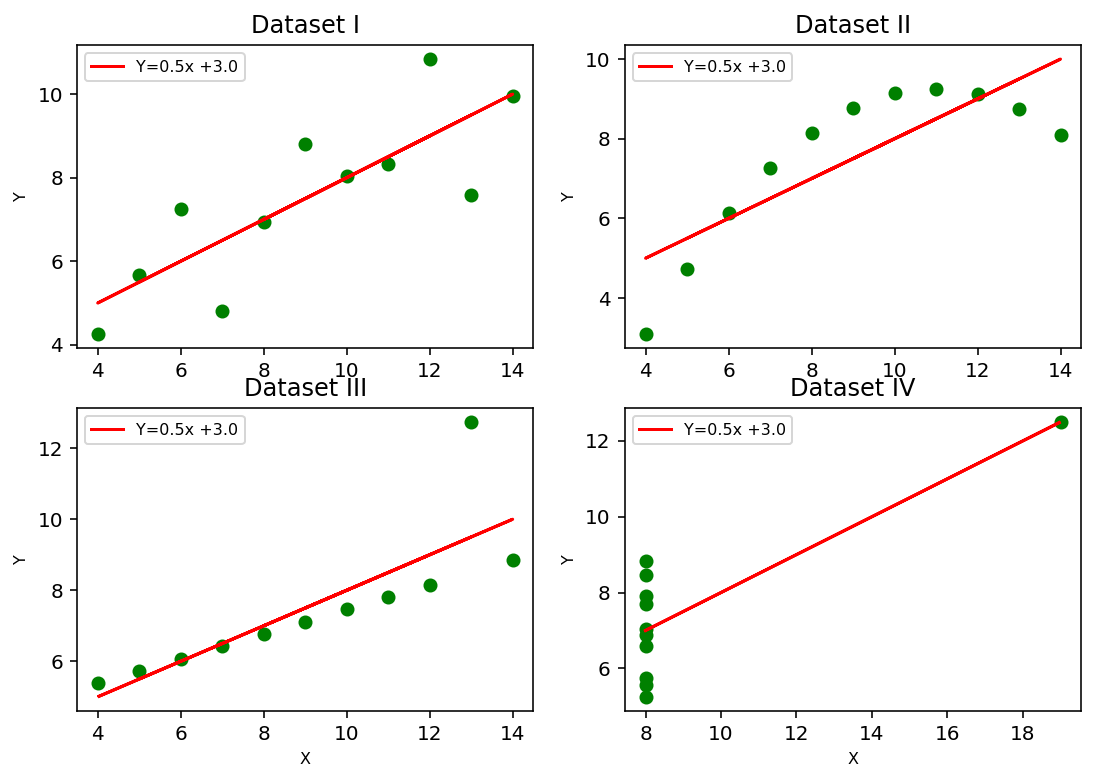

In [3]:
# plot all four plots
fig, axs = plt.subplots(2, 2, figsize=(9,6), dpi=144)

axs[0, 0].set_title('Dataset I', fontsize=12)
#axs[0, 0].set_xlabel('X', fontsize=8)
axs[0, 0].set_ylabel('Y', fontsize=8)
axs[0, 0].plot(df['x1'], df['y1'], 'go')
axs[0, 0].plot(df['x1'], m1*df['x1']+c1,'r',label='Y='+str(round(m1,2))+'x +'+str(round(c1,2)))
axs[0, 0].legend(loc='best',fontsize=8)

axs[0, 1].set_title('Dataset II',fontsize=12)
#axs[0, 1].set_xlabel('X', fontsize=8)
axs[0, 1].set_ylabel('Y', fontsize=8)
axs[0, 1].plot(df['x2'], df['y2'], 'go')
axs[0, 1].plot(df['x2'], m2*df['x2']+c2,'r',label='Y='+str(round(m2,2))+'x +'+str(round(c2,2)))
axs[0, 1].legend(loc='best',fontsize=8)

axs[1, 0].set_title('Dataset III',fontsize=12)
axs[1, 0].set_xlabel('X', fontsize=8)
axs[1, 0].set_ylabel('Y', fontsize=8)
axs[1, 0].plot(df['x3'], df['y3'], 'go')
axs[1, 0].plot(df['x3'], m1*df['x3']+c1,'r',label='Y='+str(round(m3,2))+'x +'+str(round(c3,2)))
axs[1, 0].legend(loc='best',fontsize=8)

axs[1, 1].set_title('Dataset IV',fontsize=12)
axs[1, 1].set_xlabel('X', fontsize=8)
axs[1, 1].set_ylabel('Y', fontsize=8)
axs[1, 1].plot(df['x4'], df['y4'], 'go')
axs[1, 1].plot(df['x4'], m4*df['x4']+c4,'r',label='Y='+str(round(m4,2))+'x +'+str(round(c4,2)))
axs[1, 1].legend(loc='best',fontsize=8)

plt.show()

## Focus on Dataset 1

We will performa a standard regression (not machine learning) on data set to get intution about how this works. The process will be: 

1. Build model
2. Fit data
3. Evaluate fit
4. Visualize

This looks linear, but we often have to go back and forth between them and tweak things.

### Build the model and check the coefficients

In [4]:
# A little data transform to make sure that the model gets what it needs
x = df['x1'].values.reshape(-1, 1)
Y = df['y1'].values

# create a LinearRegression object
linear_model = LinearRegression()

# fit the model using all the data
linear_model.fit(x,Y)

# print the coefficients of the model
print('Intercept:', linear_model.intercept_)
print('Coefficient:', linear_model.coef_[0])

Intercept: 3.0000909090909103
Coefficient: 0.5000909090909091


### Compute R$^2$

You've probably learned that R$^2$ is a good measure for how well a linear fit is working. Canonically, we say that a given R$^2$ will indicate what fraction of the variance the model can account for. 1.0 being a perfect fit. There are many reasons to use this measure, but as we will learn we can make more valid cliams with deeper investagations (and with machine learning techniques)

In [5]:
# predict new values using the model
y_pred = linear_model.predict(x)

# evaluate the model's performance
r_squared = linear_model.score(x, Y)
print('R-squared:', r_squared)

R-squared: 0.666542459508775


### Visualize the fit

There are several ways we can validate our fits using this approach. Three quick graphs that help are the model-fit plot, the predicted vs true plot, and the residual plot. Each of them appear below where they are also described.

#### Model-Fit Plot

This is probably the plot you are most used to seeing. All of the data are scatter plot and the line of best fit is run through them. This is the same graph as above.

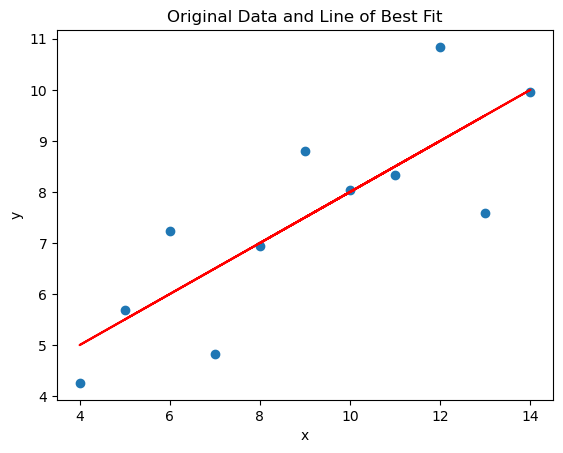

In [6]:
# plot the data and the line of best fit
plt.scatter(x, Y)
plt.plot(x, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data and Line of Best Fit')
plt.show()

#### Predicted vs. True plot

The model makes predictions (the points on the line of best fit that are calucalted from the x values). If the model were perfect the predicted values and true values would perfectly line up. However, we can see if the model is predicting better for different data if we plot the true data vs the predicted data. The 45 degree line would correspond to perfect prediction.

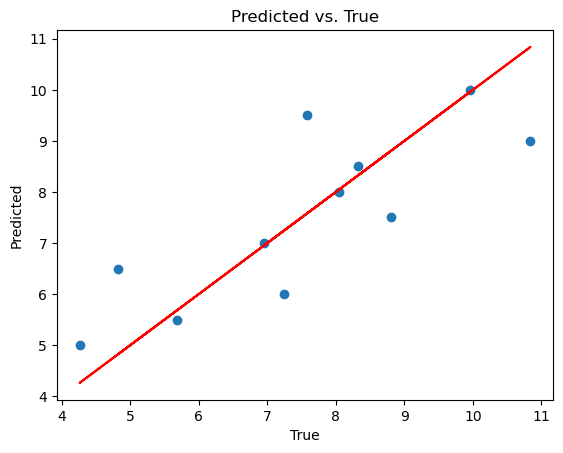

In [7]:
# plot the data and the line of best fit
plt.scatter(Y,y_pred)
plt.plot(Y, Y, color='red')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Predicted vs. True')
plt.show()

#### Residual Plot

One of the most common plots for a linear model is the residual plot, which indicates how far the predictions are from the model. The distribution of those residuals is very important and indicate if a linear model is a reasonable choice. We want those residiual plots to look random and Gaussian. If they have structure or form, a linear regression might not be our regressor of choice.

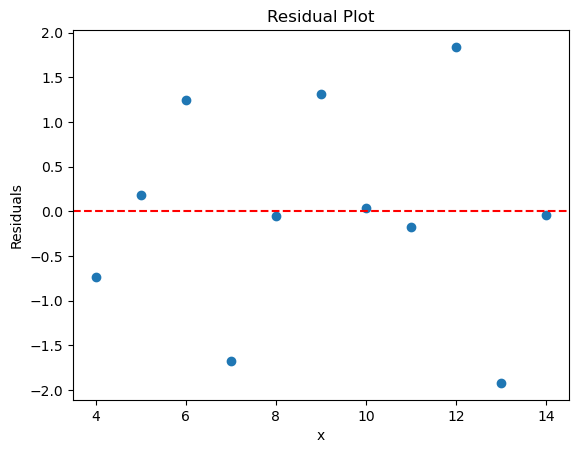

In [8]:
# calculate the residuals
residuals = Y - y_pred

# plot the residuals
plt.scatter(x, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Things to try

* Repeat this analysis for another data set. How does it compare? How can you tell that the linear model isn't the best choice?
* There's no restriction to using another type of regression algorithm. Repeat this analysis with [another regression model](https://scikit-learn.org/stable/supervised_learning.html).